In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('AmesHousing_final.csv')

In [126]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [128]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=274)

In [129]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

### Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Standard Scaler

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Ridge Regression

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV

In [135]:
ridge_cv = RidgeCV(alphas=np.logspace(-4, 2, 100), scoring='neg_mean_absolute_error', cv=5)

In [136]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.05480231e-04, 8.11130831e-04,
       9.32603347e-04, 1.07226722e-03, 1.23284674e-03, 1.41747416e-03,
       1.62975083e-03, 1.87381742e-0...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02]),
        cv=5, scoring='neg_mean_absolute_error')

In [137]:
ridge_cv.alpha_

100.0

In [138]:
ridge_cv_preds = ridge_cv.predict(X_test)

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [140]:
MAE = mean_absolute_error(y_test, ridge_cv_preds)

In [141]:
MAE

14181.772471006381

In [143]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_cv_preds))

In [144]:
RMSE

22382.639405832346

### Elastic Net

In [80]:
from sklearn.linear_model import ElasticNet

In [81]:
elastic_model = ElasticNet()

In [107]:
param_grid = {'alpha':[.01, 0.1, 1, 5, 10, 50, 100, 200, 400, 600],
              'l1_ratio':[0, .1, .25, .5, .75, .9, .95, .99, 1]}

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5,
                          verbose=1)

In [110]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415482663420.72906, tolerance: 1329549720.5334225
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372581673542.0495, tolerance: 1345184494.7812052
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402162965456.69543, tolerance: 1342667866.7359126
  model = cd_fast.enet_coordin

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377680093544.449, tolerance: 1342667866.7359126
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381127761311.49384, tolerance: 1405340214.8945827
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379280314730.13153, tolerance: 1322297906.0106246
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103625638159.06024, tolerance: 1322297906.0106246
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290633964639.25366, tolerance: 1329549720.5334225
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297713986253.433, tolerance: 1345184494.7812052
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2574082903188.2227, tolerance: 1345184494.7812052
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2609984210205.9824, tolerance: 1342667866.7359126
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2698387280585.193, tolerance: 1405340214.8945827
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5913086866242.097, tolerance: 1322297906.0106246
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6284288984063.697, tolerance: 1329549720.5334225
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6339566827524.655, tolerance: 1345184494.7812052
  model = cd_fast.enet_coordinate_descent(
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 200, 400, 600],
                         'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99,
                                      1]},
             scoring='neg_mean_squared_error', verbose=1)

Note: l1_ratio == 1, meaning full LASSO

In [111]:
grid_model.best_params_

{'alpha': 400, 'l1_ratio': 1}

In [112]:
grid_model_preds = grid_model.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
mean_absolute_error(y_test, grid_model_preds)

14012.606169405915

In [115]:
np.sqrt(mean_squared_error(y_test, grid_model_preds))

22605.37192617335

### Residuals

Validate model choice by showing that residuals are random and normally distributed.

In [118]:
residuals = y_test - grid_model_preds

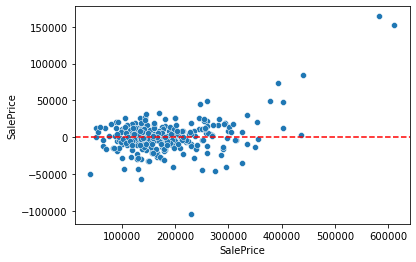

In [122]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

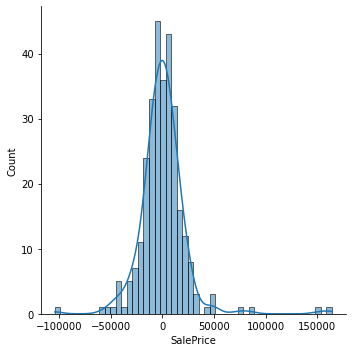

In [121]:
sns.displot(residuals, bins=50, kde=True)